In [1]:
import numpy as np
import os
import cv2
import matplotlib
from matplotlib import pyplot as plt
import itertools
import math

In [2]:
cwd = os.getcwd()

In [3]:
print(cwd)

C:\Users\kathe\Desktop\ECE549


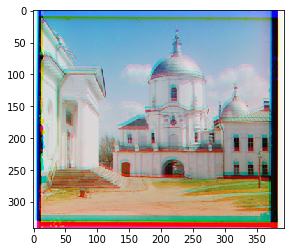

In [4]:
path = 'C:/Users/kathe/Desktop/ECE549/prokudin-gorskii/01112v.jpg'
img = plt.imread(path)
#plt.imshow(img, cmap = 'gray')
def split(img):
    b = img[0:341]
    g = img[341:682]
    r = img[682:1023]
    return b, g, r
def stack(r, g, b):
    #plt.imshow(color, cmap = 'gray')
    color = []
    for i in range(len(r)):
        col = []
        for j in range(len(r[0])):
            pixel = []
            pixel.append(r[i][j])
            pixel.append(g[i][j])
            pixel.append(b[i][j])
            col.append(pixel)
        color.append(col) 
    return color
b, g, r = split(img)
color = stack(r, g, b)
plt.imshow(color) 

(-3, -8) (-1, -8)


True

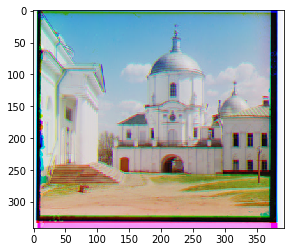

In [5]:
def ssd(x,y):
    return ((x-y)**2).sum()
def ncc(x, y):
    return ((x/np.linalg.norm(x)) * (y/np.linalg.norm(y))).ravel().sum()
def align(img1, img2, rang):
    high= -float('inf')
    for i in range(-rang, rang):
        for j in range(-rang, rang):
            roll = np.roll(img1, (i, j), axis=[1, 0])
            score = ncc(roll, img2)
            if score > high:
                offset = (i, j)
                high = score
    return offset
def roll(img, offset):
    img = np.roll(img, offset, axis=[1, 0])
    return img
rang = 15
o1 = align(b, r, rang)
o2 =  align(g, r, rang)
print(o1, o2)
b = roll(b,o1 )
g = roll(g,o2)
color = stack(r,g,b)
plt.imshow(color)  
write_path = 'C:/Users/kathe/Desktop/ECE549/results/ssd00149v.jpg'
cv2.imwrite(write_path,cv2.cvtColor(np.asarray(color), cv2.COLOR_RGB2BGR))

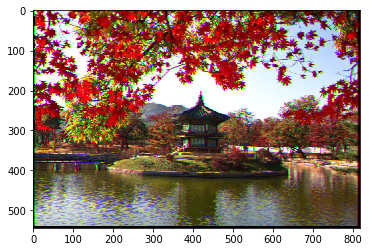

In [6]:
path = 'C:/Users/kathe/Desktop/ECE549/seoul_tableau.jpg'
img = plt.imread(path)
def split(img):
    row = math.floor(len(img)/3)
    b = img[0:row-1]
    g = img[row:row*2-1]
    r = img[row*2:row*3-1]
    return b, g, r
b, g, r = split(img)
color = stack(r, g, b)
plt.imshow(color) 
def shrink(b, g, r):
    return cv2.resize(b, None,fx=0.5,fy=0.5), cv2.resize(g,None,fx=0.5,fy=0.5), cv2.resize(r, None,fx=0.5,fy=0.5)
b_s, g_s, r_s = shrink(b, g, r)
color = stack(r_s, g_s, b_s)
plt.imshow(color) 

(1, -1) (3, 0)


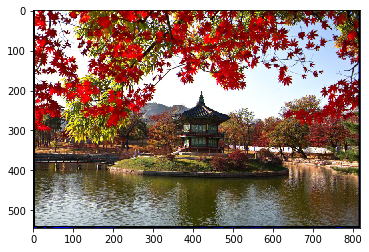

In [7]:
rang = 30
offset_b = align(b_s, r_s, rang)
offset_g = align(g_s, r_s, rang)
b_s = roll(b_s,offset_b)
g_s = roll(g_s,offset_g)
print(offset_b, offset_g)
color = stack(r_s,g_s,b_s)
plt.imshow(color)  

(-1, 0) (0, 0)


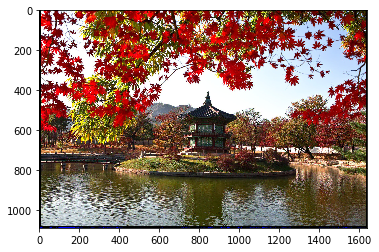

In [8]:
rang = 15
offset_b = tuple([z * 2 for z in offset_b])
offset_g = tuple([z * 2 for z in offset_g])
b = roll(b,offset_b)
g = roll(g,offset_g)
offset_b = align(b, r, rang)
b = roll(b, offset_b)
offset_g = align(g, r, rang)
g = roll(g, offset_g)
print(offset_b, offset_g)
color = stack(r,g,b)
plt.imshow(color)

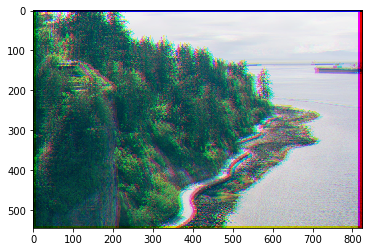

In [14]:
path = 'C:/Users/kathe/Desktop/ECE549/vancouver_tableau.jpg'
img = plt.imread(path)
def split(img):
    row = math.floor(len(img)/3)
    b = img[0:row-1]
    g = img[row:row*2-1]
    r = img[row*2:row*3-1]
    return b, g, r
b, g, r = split(img)
color = stack(r, g, b)
plt.imshow(color) 
def shrink(b, g, r):
    return cv2.resize(b, None,fx=0.5,fy=0.5), cv2.resize(g,None,fx=0.5,fy=0.5), cv2.resize(r, None,fx=0.5,fy=0.5)
b_s, g_s, r_s = shrink(b, g, r)
color = stack(r_s, g_s, b_s)
plt.imshow(color) 

(6, 4) (11, -1)


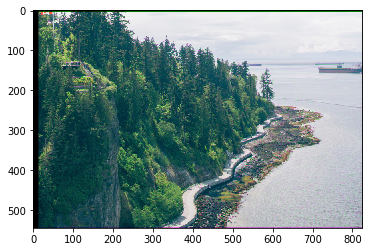

In [15]:
rang = 30
offset_b = align(b_s, r_s, rang)
offset_g = align(g_s, r_s, rang)
b_s = roll(b_s,offset_b)
g_s = roll(g_s,offset_g)
print(offset_b, offset_g)
color = stack(r_s,g_s,b_s)
plt.imshow(color) 

(0, 0) (0, 1)


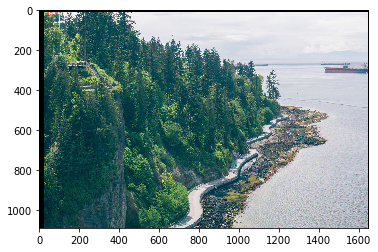

In [16]:
rang = 15
offset_b = tuple([z * 2 for z in offset_b])
offset_g = tuple([z * 2 for z in offset_g])
b = roll(b,offset_b)
g = roll(g,offset_g)
offset_b = align(b, r, rang)
b = roll(b, offset_b)
offset_g = align(g, r, rang)
g = roll(g, offset_g)
print(offset_b, offset_g)
color = stack(r,g,b)
plt.imshow(color)

28 319 23 375
[[254 254 254 ... 254 255 255]
 [254 254 254 ... 254 255 255]
 [254 254 254 ... 254 255 255]
 ...
 [255 254 254 ... 253 255 255]
 [255 254 254 ... 255 255 255]
 [255 254 254 ... 255 255 255]]


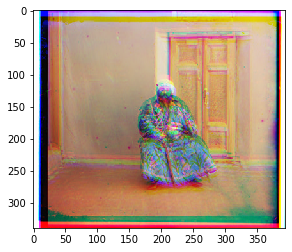

In [12]:
#extra credit: border removal
path = 'C:/Users/kathe/Desktop/ECE549/prokudin-gorskii/00153v.jpg'
img = plt.imread(path)
def border(r, g, b):
     #top, bot, left, right
    top, bot, left, right = 0,0,0,0
    for i in range(len(b)):
        if (b[i][15] < 250 and b[i][15] > 7)  and (r[i][15] < 250 and r[i][15] > 7) and (g[i][15] < 250 and g[i][15] > 7):
            top = i
            break
    for i in range(len(b)-1, -1, -1):
        if (b[i][15] < 250 and b[i][15] > 7)  and (r[i][15] < 250 and r[i][15] > 7) and (g[i][15] < 250 and g[i][15] > 7):
            bot = i
            break
    for i in range(len(b[0])):
        if (b[15][i] < 250 and b[15][i] > 7)  and (r[15][i] < 250 and r[15][i] > 7) and (g[15][i] < 250 and g[15][i] > 7):
            left = i
            break
    for i in range(len(b[0])-1, -1, -1):
        if (b[15][i] < 250 and b[15][i] > 7)  and (r[15][i] < 250 and r[15][i] > 7) and (g[15][i] < 250 and g[15][i] > 7):
            right = i
            break
    print(top, bot, left, right)
    b = b[top:bot,left:right]
    r = r[top:bot,left:right]
    g = g[top:bot,left:right]
    return b, g, r
b, g, r = split(img)
bb, gb, rb = border(r, g, b)
color = stack(r, g, b)
plt.imshow(color)
print(b)

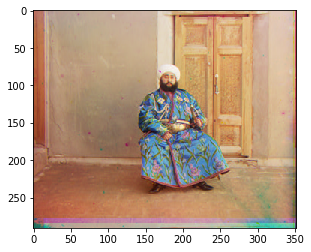

In [13]:
rang = 15
bb = roll(bb, align(bb, rb, rang))
gb = roll(gb, align(gb, rb, rang))
color = stack(rb,gb,bb)
plt.imshow(color)  